# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt



**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [2]:
A1,b1 = main.random_matrix_Ab(10);
A2,b2 = main.diag_dominant_matrix_A_b(10)
A3,b3 = main.symmetric_matrix_A_b(10)
x_init = np.zeros(10)
epsilon = 1e-12
maxiter = [1, 2, 4, 6, 8, 10, 12, 14,16, 18,20]
GMRES_result = []

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [3]:
x1 = np.linalg.solve(A1,b1)
print("Jakość rozwiązania równania metodą solve: {0}".format(main.residual_norm(A1,x1,b1)))
if main.is_diag_dominant(A1) is False:
    print('Macierz nie spełnia warunków dotyczących metody solve_jacobi\n')

if main.is_symmetric(A1) is False:
    print('Macierz nie spełnia warunków dotyczących metody gradientów sprzężonych\n')


Jakość rozwiązania równania metodą solve: 6.468671174810107e-13
Macierz nie spełnia warunków dotyczących metody solve_jacobi

Macierz nie spełnia warunków dotyczących metody gradientów sprzężonych



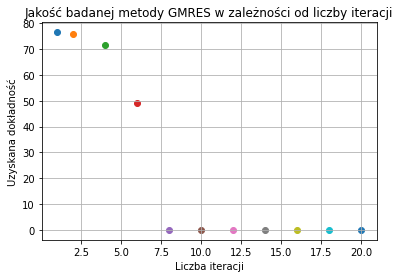

Czas wykonywania metody GMRES w zależności od liczby iteracji

Liczba iteracji: 1
Czas: 
5.66 ms ± 295 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 2
Czas: 
7.47 ms ± 182 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 4
Czas: 
11.8 ms ± 446 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 6
Czas: 
16 ms ± 191 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 8
Czas: 
16.7 ms ± 230 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 10
Czas: 
404 µs ± 11.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 12
Czas: 
413 µs ± 18.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 14
Czas: 
407 µs ± 13.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 16
Czas: 
399 µs ± 21.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 18
Czas: 
366 µs ± 43.7 µs per loop (mean ± std. dev. 

In [4]:
for i in range(len(maxiter)):
    ans = sp_linalg.gmres(A1, b1, x_init, epsilon, maxiter[i])[0]
    norm = main.residual_norm(A1, ans, b1)
    GMRES_result.append(norm)
    
    plt.scatter(maxiter[i], GMRES_result[i])
    plt.title('Jakość badanej metody GMRES w zależności od liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()


print("Czas wykonywania metody GMRES w zależności od liczby iteracji\n")
for i in range(len(maxiter)):
    print("Liczba iteracji: {0}".format(maxiter[i]))
    print('Czas: ')
    saved_timing = %timeit -r 5 -n 10 -o sp_linalg.gmres(A1, b1, x_init, epsilon, maxiter[i])
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
  
    

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [5]:
x1  = np.linalg.solve(A2,b2)
print("Jakość rozwiązania równania metodą solve: {0}\n".format(main.residual_norm(A2,x1,b2)))
if main.is_diag_dominant(A2) is True:
    print('Macierz spełnia warunki dotyczące metody solve_jacobi \n')
if main.is_symmetric(A2) is False:
    print('Macierz nie spełnia warunków dot. metody gradientów sprzężonych')


Jakość rozwiązania równania metodą solve: 4.429775955663296e-15

Macierz spełnia warunki dotyczące metody solve_jacobi 

Macierz nie spełnia warunków dot. metody gradientów sprzężonych


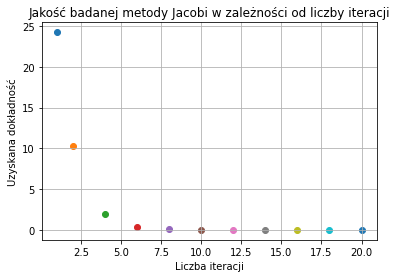

Czas wykonywania metody Jacobi w zależności od liczby iteracji
Liczba iteracji: 1
Czas: 
52.3 µs ± 6.96 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 2
Czas: 
The slowest run took 5.22 times longer than the fastest. This could mean that an intermediate result is being cached.
119 µs ± 98.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 4
Czas: 
123 µs ± 21.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 6
Czas: 
131 µs ± 41.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 8
Czas: 
169 µs ± 37.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 10
Czas: 
209 µs ± 35.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 12
Czas: 
219 µs ± 52.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 14
Czas: 
249 µs ± 49.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 16
Czas: 
272 µs ± 36.5 µs per

In [6]:
jacobi_result = []

for i in range(len(maxiter)):
    ans = main.solve_jacobi(A2,b2,x_init,epsilon,maxiter[i])[0]
    norm = main.residual_norm(A2, ans, b2)
    jacobi_result.append(norm)
    
    plt.scatter(maxiter[i], jacobi_result[i])
    plt.title('Jakość badanej metody Jacobi w zależności od liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()


print("Czas wykonywania metody Jacobi w zależności od liczby iteracji")
for i in range(len(maxiter)):
    print("Liczba iteracji: {0}".format(maxiter[i]))
    print('Czas: ')
    saved_timing = %timeit -r 5 -n 10 -o main.solve_jacobi(A2, b2, x_init, epsilon, maxiter[i])
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe

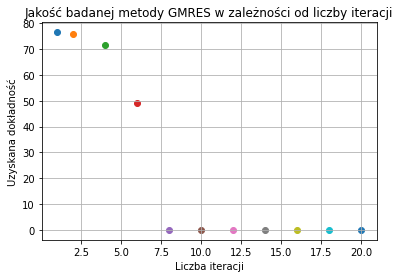

Czas wykonywania metody GMRES w zależności od liczby iteracji

Liczba iteracji: 1
Czas: 
1.49 ms ± 89.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 2
Czas: 
986 µs ± 44.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 4
Czas: 
578 µs ± 53.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 6
Czas: 
565 µs ± 59 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 8
Czas: 
566 µs ± 55.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 10
Czas: 
402 µs ± 48.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 12
Czas: 
430 µs ± 87.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 14
Czas: 
511 µs ± 111 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 16
Czas: 
442 µs ± 143 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 18
Czas: 
420 µs ± 56.3 µs per loop (mean ± std. dev. o

In [7]:
for i in range(len(maxiter)):
    ans = sp_linalg.gmres(A2, b2, x_init, epsilon, maxiter[i])[0]
    norm = main.residual_norm(A2, ans, b2)
    GMRES_result.append(norm)
    
    plt.scatter(maxiter[i], GMRES_result[i])
    plt.title('Jakość badanej metody GMRES w zależności od liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()


print("Czas wykonywania metody GMRES w zależności od liczby iteracji\n")
for i in range(len(maxiter)):
    print("Liczba iteracji: {0}".format(maxiter[i]))
    print('Czas: ')
    saved_timing = %timeit -r 5 -n 10 -o sp_linalg.gmres(A2, b2, x_init, epsilon, maxiter[i])
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe
  
    

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

In [8]:
x1  = np.linalg.solve(A3,b3)
print("Jakość rozwiązania równania metodą solve: {0}\n".format(main.residual_norm(A3,x1,b3)))
if main.is_diag_dominant(A1) is False:
    print('Macierz nie spełnia warunków dot. metody solve_jacobi\n')
if main.is_symmetric(A3) is True:
    print('Macierz spełnia warunki dot. metody gradientów sprzężonych \n')

Jakość rozwiązania równania metodą solve: 4.445330772370752e-14

Macierz nie spełnia warunków dot. metody solve_jacobi

Macierz spełnia warunki dot. metody gradientów sprzężonych 



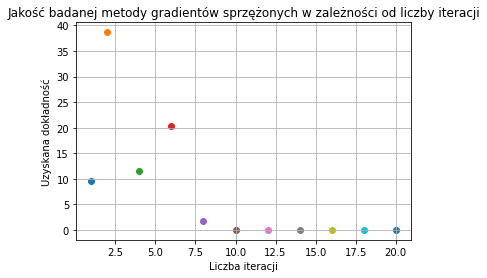

Czas wykonywania metody gradientów sprzężonych w zależności od liczby iteracji

Liczba iteracji: 1
Czas: 
154 µs ± 30.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 2
Czas: 
191 µs ± 36.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 4
Czas: 
259 µs ± 24.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 6
Czas: 
305 µs ± 7.31 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 8
Czas: 
372 µs ± 10.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 10
Czas: 
469 µs ± 41.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 12
Czas: 
The slowest run took 6.75 times longer than the fastest. This could mean that an intermediate result is being cached.
1.08 ms ± 944 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 14
Czas: 
523 µs ± 145 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 16
Czas: 
468 µ

In [9]:
cg_result = []
for i in range(len(maxiter)):
    ans = sp_linalg.cg(A3, b3, x_init, epsilon, maxiter[i])[0]
    norm = main.residual_norm(A3, ans, b3)
    cg_result.append(norm)
    
    plt.scatter(maxiter[i], cg_result[i])
    plt.title('Jakość badanej metody gradientów sprzężonych w zależności od liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()


print("Czas wykonywania metody gradientów sprzężonych w zależności od liczby iteracji\n")
for i in range(len(maxiter)):
    print("Liczba iteracji: {0}".format(maxiter[i]))
    print('Czas: ')
    saved_timing = %timeit -r 5 -n 10 -o sp_linalg.cg(A3, b3, x_init, epsilon, maxiter[i])
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe

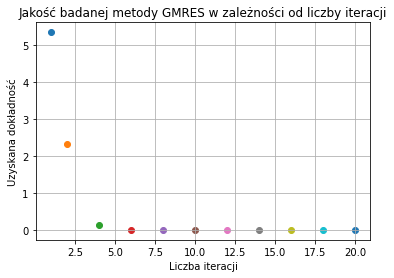

Czas wykonywania metody GMRES w zależności od liczby iteracji

Liczba iteracji: 1
Czas: 
5.73 ms ± 273 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 2
Czas: 
7.46 ms ± 233 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 4
Czas: 
11.6 ms ± 282 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 6
Czas: 
15.6 ms ± 226 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 8
Czas: 
15 ms ± 477 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 10
Czas: 
395 µs ± 106 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 12
Czas: 
393 µs ± 32 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 14
Czas: 
357 µs ± 43.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 16
Czas: 
392 µs ± 30.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
Liczba iteracji: 18
Czas: 
403 µs ± 16.9 µs per loop (mean ± std. dev. of 

In [10]:
GMRES_result = []
for i in range(len(maxiter)):
    ans = sp_linalg.gmres(A3, b3, x_init, epsilon, maxiter[i])[0]
    norm = main.residual_norm(A3, ans, b3)
    GMRES_result.append(norm)
    
    plt.scatter(maxiter[i], GMRES_result[i])
    plt.title('Jakość badanej metody GMRES w zależności od liczby iteracji')
    plt.xlabel('Liczba iteracji')
    plt.ylabel('Uzyskana dokładność')
    plt.grid()
plt.show()


print("Czas wykonywania metody GMRES w zależności od liczby iteracji\n")
for i in range(len(maxiter)):
    print("Liczba iteracji: {0}".format(maxiter[i]))
    print('Czas: ')
    saved_timing = %timeit -r 5 -n 10 -o sp_linalg.gmres(A3, b3, x_init, epsilon, maxiter[i])
    saved_timing.average   # średni czas próby
    saved_timing.stdev     # odchylenie standardowe

Wnioski:

Funkcja solve:

Funkcję solve mogłem zastosować do każdego rodzaju macierzy. Wartośc normy dla wszsytkich macierzy wychodziła zbliżona. Nie zajmowałem się badaniem złożoności czasowej, ponieważ robiłem to na wcześniejszych zajęciach.

Funkcja solve_jacobi:

Funkcję solve_jacobi mogłem zastosować tylko do macierzy zdominowanej diagonalnie(czyli tej z podpunktu B). Wartości normy na wykresie układają się jak wartości funkcji eskponencjalnej z ujemnym wykładnikiem a więc dążą do zera wraz z rosnącą liczbą iteracji co jest optymistyczne.Czas wykonania rośnie wraz z ilością iteracji.




Funkcja gradientów sprzężonych:

Z tej funkcji skorzystałem tylko w przypadku macierzy symetrycznej(podpunkt C). Jeśli chodzi o jakość to do około 10 iteracji, wartość normy zachowuje się nieprzewidywalnie a po osiągnięciu 10 i więcej iteracji, norma stabilizuje się na poziomie zera .Złożoność czasowa rośnie liniowo wraz ze wzrostem iteracji.


Funkcja GMRES

Z tej funkcji mogłem skorzystać przy okazji każdej macierzy.Wartości normy szybko zbliżają i stabilizują się na poziomie zera co jest optymistyczne. W przypadku złożoności czasowej, natrafiamy tutaj na dziwny przypadek, ponieważ w podpunckie a i c, dla początkowych ilości iteracji czas wykonywania rośnie by następnie od pewnej ilości iteracji zacząć maleć.W podpunckie b,czas spada odrazu wraz z wzrostem ilości iteracji.Jest to jedyny taki przykład na tym laboratorium.





Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)